In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Numerical attributes = PassengerId, Age, SibSp, Parch, Fare 
- to use standard scaler

Categorical attributes = Survived, Pclass, Sex, Cabin, Embarked
- OneHotEncoder or get_dummies

Unique/Primary key = Name, Ticket

SHOULD I COMBINE TRAIN AND TEST DATA? 

Fill in NULL values with mean/median ->



In [5]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women survived:", rate_women)

% of women survived: 0.7420382165605095


In [6]:
men = train.loc[train.Sex == 'male']["Survived"]
print(sum(men), len(men))
rate_men = sum(men)/len(men)

print('% of men who survived:', rate_men)

109 577
% of men who survived: 0.18890814558058924


<AxesSubplot:>

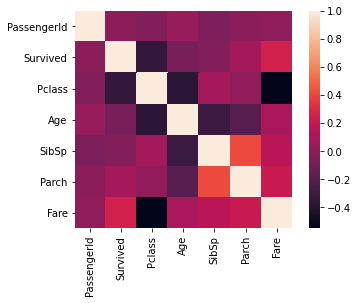

In [7]:
sns.heatmap(train.corr(), square = True)

In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
#Define x and y

y = train["Survived"].values

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare"]
x = train[features].values
#x_test = pd.get_dummies(test[features])

In [11]:
#Splitting training and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
x

array([[3, 'male', 1, 0, 7.25],
       [1, 'female', 1, 0, 71.2833],
       [3, 'female', 0, 0, 7.925],
       ...,
       [3, 'female', 1, 2, 23.45],
       [1, 'male', 0, 0, 30.0],
       [3, 'male', 0, 0, 7.75]], dtype=object)

In [13]:
x_train

array([[3, 'female', 0, 2, 15.2458],
       [2, 'male', 0, 0, 10.5],
       [2, 'male', 1, 1, 37.0042],
       ...,
       [3, 'male', 0, 0, 7.7333],
       [3, 'female', 1, 0, 17.4],
       [2, 'male', 1, 1, 39.0]], dtype=object)

In [14]:
# Handling or Encode categorical variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("Pclass", OneHotEncoder(), [0])], remainder = 'passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.fit_transform(x_test)

np.set_printoptions(threshold=np.inf)
x_train

array([[0.0, 0.0, 1.0, 'female', 0, 2, 15.2458],
       [0.0, 1.0, 0.0, 'male', 0, 0, 10.5],
       [0.0, 1.0, 0.0, 'male', 1, 1, 37.0042],
       [0.0, 0.0, 1.0, 'male', 0, 0, 4.0125],
       [0.0, 0.0, 1.0, 'male', 0, 0, 7.25],
       [1.0, 0.0, 0.0, 'male', 0, 0, 28.5],
       [0.0, 0.0, 1.0, 'male', 0, 0, 8.05],
       [0.0, 0.0, 1.0, 'female', 0, 0, 7.8792],
       [0.0, 1.0, 0.0, 'male', 0, 0, 0.0],
       [0.0, 0.0, 1.0, 'male', 0, 0, 7.775],
       [0.0, 1.0, 0.0, 'female', 1, 1, 30.0],
       [0.0, 0.0, 1.0, 'female', 1, 0, 9.825],
       [1.0, 0.0, 0.0, 'male', 1, 0, 52.0],
       [0.0, 0.0, 1.0, 'female', 0, 0, 7.225],
       [0.0, 0.0, 1.0, 'female', 0, 0, 7.7375],
       [0.0, 0.0, 1.0, 'male', 0, 0, 7.75],
       [1.0, 0.0, 0.0, 'male', 0, 1, 61.9792],
       [0.0, 0.0, 1.0, 'male', 0, 0, 8.05],
       [0.0, 0.0, 1.0, 'female', 1, 1, 11.1333],
       [1.0, 0.0, 0.0, 'male', 0, 0, 26.55],
       [0.0, 0.0, 1.0, 'male', 0, 0, 0.0],
       [0.0, 0.0, 1.0, 'male', 0, 0, 8.05]

In [15]:
x_test

array([[0.0, 0.0, 1.0, 'male', 0, 0, 14.4583],
       [0.0, 0.0, 1.0, 'male', 0, 0, 7.55],
       [0.0, 0.0, 1.0, 'male', 4, 1, 29.125],
       [1.0, 0.0, 0.0, 'female', 1, 0, 146.5208],
       [0.0, 0.0, 1.0, 'female', 0, 2, 15.2458],
       [1.0, 0.0, 0.0, 'male', 0, 0, 30.5],
       [1.0, 0.0, 0.0, 'female', 0, 0, 153.4625],
       [1.0, 0.0, 0.0, 'female', 0, 2, 164.8667],
       [1.0, 0.0, 0.0, 'male', 1, 0, 91.0792],
       [0.0, 0.0, 1.0, 'female', 0, 0, 7.2292],
       [0.0, 0.0, 1.0, 'male', 1, 0, 7.8542],
       [0.0, 1.0, 0.0, 'female', 0, 0, 13.0],
       [0.0, 0.0, 1.0, 'male', 0, 0, 7.75],
       [0.0, 1.0, 0.0, 'female', 0, 2, 26.25],
       [1.0, 0.0, 0.0, 'female', 0, 0, 83.1583],
       [0.0, 0.0, 1.0, 'female', 0, 0, 7.8542],
       [0.0, 0.0, 1.0, 'male', 0, 0, 9.225],
       [0.0, 1.0, 0.0, 'male', 1, 1, 36.75],
       [0.0, 0.0, 1.0, 'male', 0, 0, 8.05],
       [0.0, 0.0, 1.0, 'male', 0, 1, 8.5167],
       [0.0, 1.0, 0.0, 'male', 0, 0, 11.5],
       [1.0, 0.0, 0.0

In [16]:
labelencoder_x = LabelEncoder()
x_train[:,3] = labelencoder_x.fit_transform(x_train[:,3])
x_test[:,3] = labelencoder_x.fit_transform(x_test[:,3])

In [17]:
x_train

array([[0.0, 0.0, 1.0, 0, 0, 2, 15.2458],
       [0.0, 1.0, 0.0, 1, 0, 0, 10.5],
       [0.0, 1.0, 0.0, 1, 1, 1, 37.0042],
       [0.0, 0.0, 1.0, 1, 0, 0, 4.0125],
       [0.0, 0.0, 1.0, 1, 0, 0, 7.25],
       [1.0, 0.0, 0.0, 1, 0, 0, 28.5],
       [0.0, 0.0, 1.0, 1, 0, 0, 8.05],
       [0.0, 0.0, 1.0, 0, 0, 0, 7.8792],
       [0.0, 1.0, 0.0, 1, 0, 0, 0.0],
       [0.0, 0.0, 1.0, 1, 0, 0, 7.775],
       [0.0, 1.0, 0.0, 0, 1, 1, 30.0],
       [0.0, 0.0, 1.0, 0, 1, 0, 9.825],
       [1.0, 0.0, 0.0, 1, 1, 0, 52.0],
       [0.0, 0.0, 1.0, 0, 0, 0, 7.225],
       [0.0, 0.0, 1.0, 0, 0, 0, 7.7375],
       [0.0, 0.0, 1.0, 1, 0, 0, 7.75],
       [1.0, 0.0, 0.0, 1, 0, 1, 61.9792],
       [0.0, 0.0, 1.0, 1, 0, 0, 8.05],
       [0.0, 0.0, 1.0, 0, 1, 1, 11.1333],
       [1.0, 0.0, 0.0, 1, 0, 0, 26.55],
       [0.0, 0.0, 1.0, 1, 0, 0, 0.0],
       [0.0, 0.0, 1.0, 1, 0, 0, 8.05],
       [0.0, 0.0, 1.0, 0, 1, 0, 14.4542],
       [0.0, 1.0, 0.0, 1, 0, 0, 10.5],
       [0.0, 0.0, 1.0, 0, 1, 0, 11.2417],

3 first columns -> Pclass 1, Pclass 2, Pclass 3

In [18]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [19]:
# Random Forest Classification
# Fitting decision tree classification classifier to the training set

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, random_state=1)

In [20]:
# Predict the test result

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [21]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [22]:
# Confusion matrix and accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [23]:
cm

array([[99, 11],
       [20, 49]], dtype=int64)

In [24]:
ac

0.8268156424581006